# FIT5145 - Assignment 1 
# UserId: sriz0004 
# Name: Ali Rizvi





## Task A. Investigating Job Vacancy and Unemployment Rate Data

### A1. Investigating the Population Data

#### 1. Create a data frame with these columns and rename the columns for each state.

In [0]:
#importing libraries; more libraries will be added later if needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#code to show plots inline
%matplotlib inline

#display multiple df in one code segment
from IPython.display import display

In [0]:
#import data into dataframe
pop = pd.read_csv('EstimatedResidentPopulationByStateAndGender.csv')

filter Columns https://stackoverflow.com/questions/2152898/filtering-a-list-of-strings-based-on-contents

In [0]:
#keep the desired columns - date, state populations and remove total Australia population
filt_columns = [x for x in pop.columns if ('Persons' in x) | ('Unnamed' in x)]
pop = pop[filt_columns]
pop = pop.iloc[:,:-1]

In [0]:
#check datatypes of the required data
pop.dtypes

Unnamed: 0                                                                    object
Estimated Resident Population ;  Persons ;  New South Wales ;                  int64
Estimated Resident Population ;  Persons ;  Victoria ;                         int64
Estimated Resident Population ;  Persons ;  Queensland ;                       int64
Estimated Resident Population ;  Persons ;  South Australia ;                  int64
Estimated Resident Population ;  Persons ;  Western Australia ;                int64
Estimated Resident Population ;  Persons ;  Tasmania ;                         int64
Estimated Resident Population ;  Persons ;  Northern Territory ;               int64
Estimated Resident Population ;  Persons ;  Australian Capital Territory ;     int64
dtype: object

In [0]:
#rename the columns as desired
pop.columns = [x.lstrip('Estimated Resident Population ; Persons ; ').rstrip(' ;') for x in pop.columns]
pop.rename(columns = {'Unnamed: 0' : 'Date'}, inplace=True)

In [0]:
#change the format of the date
pop.Date = pd.to_datetime(pop.Date, dayfirst=True)

In [0]:
#check the dataframe after changes
pop.dtypes

Date                            datetime64[ns]
New South Wales                          int64
Victoria                                 int64
Queensland                               int64
South Australia                          int64
Western Australia                        int64
Tasmania                                 int64
Northern Territory                       int64
Australian Capital Territory             int64
dtype: object

#### 2. In Python (or R) plot the population of Victoria, New South Wales and Queensland over time. You don't need to put the dates on the x-axis, just showing the index of each quarter is fine.

In [0]:
pop.head()

,Date,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505
1,2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299
2,2006-06-01,6742690,5061266,4007992,1552529,2050581,489302,209057,335170
3,2006-09-01,6766133,5083593,4031580,1557332,2064032,490354,210284,336547
4,2006-12-01,6786160,5103965,4055845,1561300,2076867,491515,211029,338381


Text(0.5,1,'Quarter vs Population of Aus States')

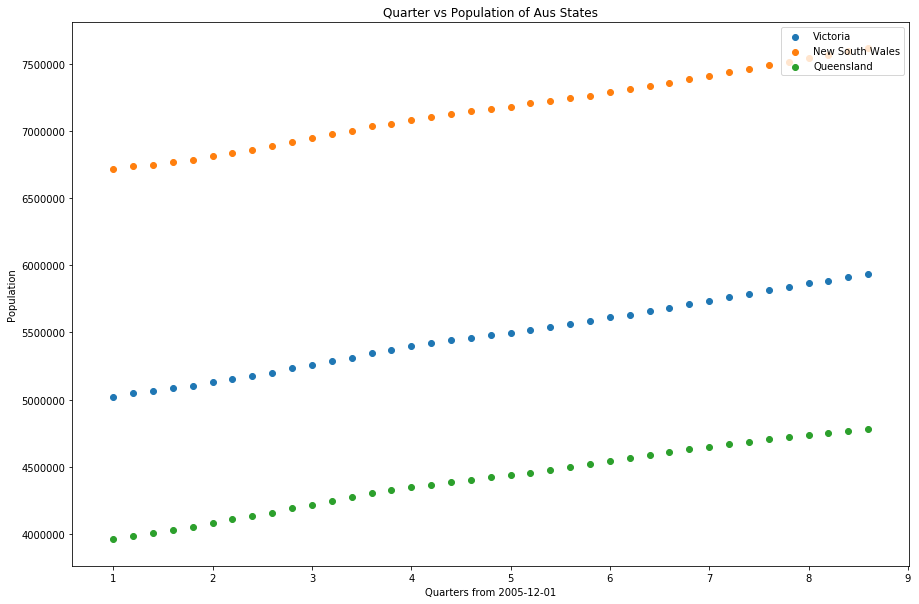

In [0]:
#creating plot
fig1, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(pop.index, pop['Victoria'])
ax.scatter(pop.index, pop['New South Wales'])
ax.scatter(pop.index, pop['Queensland'])

#customising plot
ax.set_xticklabels(pop.index)
ax.legend(loc='upper right')
ax.set_ylabel('Population')
ax.set_xlabel('Quarters from 2005-12-01')
ax.set_title('Quarter vs Population of Aus States')

##### a. Are the population values increasing or decreasing over time?

The population values are increasing over time.

##### b. Does the population data exhibit a trend and if so, what type?

The population data seems to follow a linear trend.

#### 3. Fit a linear regression to the Victorian population data and plot the linear fit. (HINT: In Python, you can use the "range(1,n)" function to generate a sequence of integer values: 1,2,...,n.)

In [0]:
#create line of best fit using linregress
gradient, intercept, r_value, p_value, std_err = linregress(pop.index, pop.Victoria)
line = [gradient*xi + intercept for xi in pop.index]

Legend location in graph https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot

Text(0.5,1,'Quarter vs Population of Victoria')

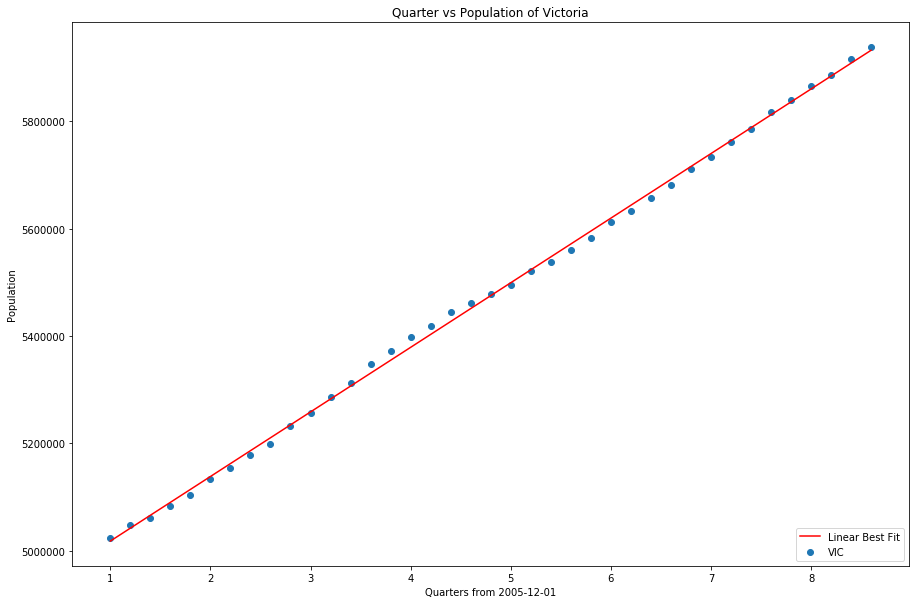

In [0]:
#create plot
fig2, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(pop.index, pop['Victoria'], label='VIC')
ax.plot(pop.index, line, 'r-', label='Linear Best Fit')

#customise plot
ax.set_xticklabels(pop.index)
ax.legend(loc='lower right')
ax.set_ylabel('Population')
ax.set_xlabel('Quarters from 2005-12-01')
ax.set_title('Quarter vs Population of Victoria')

##### a. There should be a good linear fit to this data. What does this regression model predict the resident population in Victoria will be for the following dates: 1/9/15, 1/12/15, 1/12/16 and 1/12/17?

In [0]:
#import libraries to find difference in dates
from dateutil import relativedelta
from dateutil.parser import parse

In [0]:
#list of dates that need to checked and found index for 
my_dates = ['1/9/15', '1/12/15', '1/12/16', '1/12/17']

Calculating difference between dates 
https://gist.github.com/amalgjose/c767a4846d6ecaa3b6d7

Using Parser
https://chrisalbon.com/python/basics/strings_to_datetime/


In [0]:
#funcation created to calculate number of quarters between two dates; dates to be provided with dayfirst 
def diff_quarter(a_date, start_date):
    first_date = parse(start_date, dayfirst=True)
    new_date = parse(a_date, dayfirst=True)
    diff = relativedelta.relativedelta(new_date, first_date)
    quarter = (diff.years*12 + diff.months)
    quarter = quarter/3
    return int(quarter)

In [0]:
#create list for quarters to find index
my_quarters = [diff_quarter(a_date,'1/12/2005') for a_date in my_dates]
my_quarters

[39, 40, 44, 48]

In [0]:
#create list of population using the line of best fit
my_population = [int(gradient*xi + intercept) for xi in my_quarters]

In [0]:
#show population values
my_population

[5955909, 5979953, 6076128, 6172303]

The predicted population for the provided dates are 5955909, 5979953, 6076128, and 6172303.

### A2. Investigating Enrolment Data (10 marks)

#### 1. Create a data frame with each of the university enrolments and dates.

In [0]:
#read file
enrol = pd.read_csv('StudentEnrolment.csv')

In [0]:
#check data frame
enrol.head()

,Unnamed: 0,UNSW,USYD,ANU,Uni Melb,Monash,AU,UQ,UWA
0,1/12/05,39183,45630,14317,41827,54950,18943,37177,17082
1,1/3/06,38776,45848,14553,43389,54824,19290,37518,17761
2,1/6/06,38776,45848,14553,43389,54824,19290,37518,17761
3,1/9/06,38776,45848,14553,43389,54824,19290,37518,17761
4,1/12/06,38776,45848,14553,43389,54824,19290,37518,17761


In [0]:
#remove the date column from data frame as it wont be needed
enrol = enrol.iloc[:,1:]
enrol.head()

,UNSW,USYD,ANU,Uni Melb,Monash,AU,UQ,UWA
0,39183,45630,14317,41827,54950,18943,37177,17082
1,38776,45848,14553,43389,54824,19290,37518,17761
2,38776,45848,14553,43389,54824,19290,37518,17761
3,38776,45848,14553,43389,54824,19290,37518,17761
4,38776,45848,14553,43389,54824,19290,37518,17761


#### 2. In Python (or R) plot the enrolments of eight universities over time. You don't need to put the dates on the x-axis, just showing the index of each quarter is fine.

Setting legend in one go https://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.legend

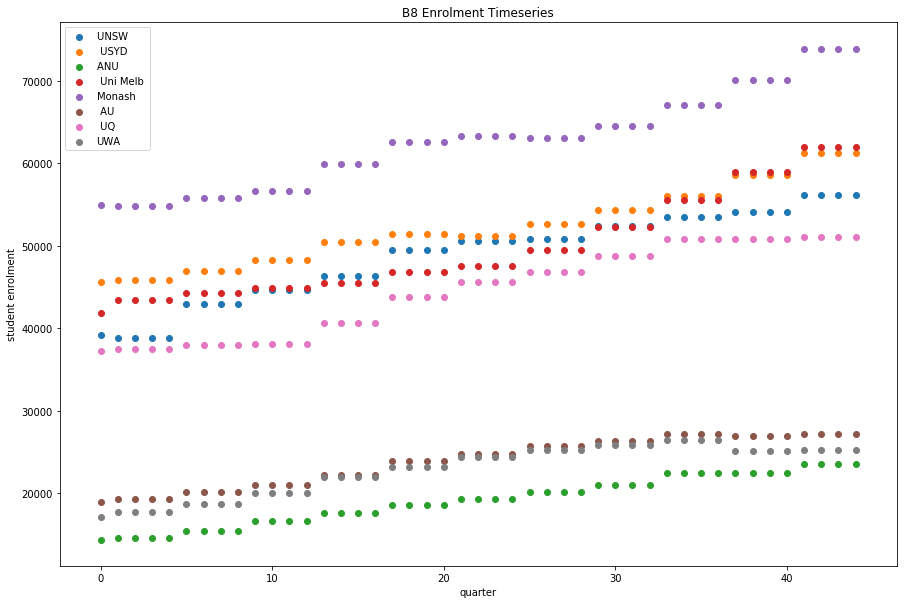

In [0]:
#create the plot
fig3, ax = plt.subplots(1,1, figsize=(15,10))

#create loop to plot all states
for col in enrol.columns:
    ax.scatter(enrol.index, enrol[col])

#customise the plot
ax.set_xlabel('quarter')
ax.set_ylabel('student enrolment')
ax.set_title('B8 Enrolment Timeseries')
ax.legend(enrol.columns)
ax.legend()

##### a. Which of the enrolment values are obviously increasing or decreasing over time? Comment on the rate of change.

The enrolments for all of the big 8 universities seems to be increasing with time. Although the rate of increase seems to be different for different universities. To identy the rate of change properly we could try to identify the general rate of increase of enrolments per quarter for each university

using shape to calculate the number of rows than len or other methods https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

In [0]:
#rough estimate of the rate of increase (using formula of slope of a linear equation - Rise/Run)

change_per_qtr = (enrol.iloc[-1,:] - enrol.iloc[0,:]) / enrol.shape[0]
change_per_qtr

UNSW          375.711111
 USYD         346.533333
ANU           205.644444
 Uni Melb     446.911111
Monash        419.044444
 AU           183.466667
 UQ           308.755556
UWA           180.400000
dtype: float64

As shown by the rate of increase for each university we can see that the rate is different for each university with some increasing at a much higher rate compared to others. 

##### b. What state has the university with the highest enrolments? What university is this?

In [0]:
#finding out the university with the max enrolments in a quarter
enrol.max()

UNSW          56090
 USYD         61224
ANU           23571
 Uni Melb     61938
Monash        73807
 AU           27199
 UQ           51071
UWA           26379
dtype: int64

In [0]:
#finding the university with the overall cumulative count of enrolments over the time period. 
enrol.sum()

UNSW          2197935
 USYD         2353062
ANU            860217
 Uni Melb     2244351
Monash        2820754
 AU           1077563
 UQ           2004361
UWA           1031346
dtype: int64

The State of Victoria has the university with the highest enrolments. As seen in the plot and the above queries, we can see that Monash University holds the highest enrolment of students in a given quarter as well as the highest cumulative total of enrolments over the time period amongst all other B8 universities. 

##### c. Why are these universities more likely to have such high enrolments? (HINT: Revisit your graph of the population data)

These universities are more likely to have higher enrolments as they are located in Australian States that have higher populations compared to the rest. Most of the population of Australia resides in the states of New South Wales and Victoria hence its universities would have higher enrolments. Also having a higher population results in other factors that effect enrolments such as development of the states, family/relatives close by, business/job opportunities etc. 

Another factor is that 5 of the 8 top Australian universities are located in the area covered by the states Victoria and New South Wales and hence the probability of having a high enrolment university is higher for these two states compared to other Australian States. 

#### 3. Fit a linear regression to the Victorian students enrolment data and plot the linear fit. (HINT: In Python, you can use the "range(1,n)" function to generate a sequence of integer values: 1,2,...,n.)

In [0]:
enrol.columns

Index(['UNSW ', ' USYD ', 'ANU ', ' Uni Melb ', 'Monash', ' AU ', ' UQ ',
       'UWA'],
      dtype='object')

In [0]:
#first create column for total victorian students
enrol['Vic_tot_enrols'] = enrol['Monash'] + enrol[' Uni Melb ']
enrol.head()

,UNSW,USYD,ANU,Uni Melb,Monash,AU,UQ,UWA,Vic_tot_enrols
0,39183,45630,14317,41827,54950,18943,37177,17082,96777
1,38776,45848,14553,43389,54824,19290,37518,17761,98213
2,38776,45848,14553,43389,54824,19290,37518,17761,98213
3,38776,45848,14553,43389,54824,19290,37518,17761,98213
4,38776,45848,14553,43389,54824,19290,37518,17761,98213


In [0]:
#find out the equation of the line of best of fit
slope, intercept, r_value, p_value, std_err = linregress(enrol.index, enrol['Vic_tot_enrols'])
lin = [slope*x + intercept for x in enrol.index]

Text(0.5,1,'Total enrolments vs quarters (Victoria)')

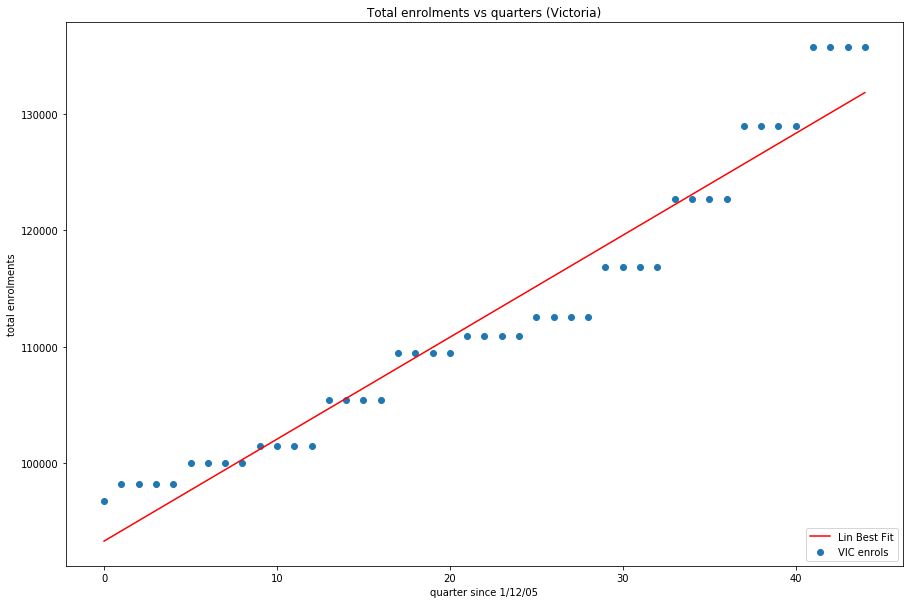

In [0]:
#plot it on graph
fig4, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(enrol.index, enrol['Vic_tot_enrols'], label='VIC enrols')
ax.plot(enrol.index, lin, 'r-', label='Lin Best Fit')

#customise plot
ax.legend(loc='lower right')
ax.set_xlabel('quarter since 1/12/05')
ax.set_ylabel('total enrolments')
ax.set_title('Total enrolments vs quarters (Victoria)')


##### a. Do these linear fits look good? Why does one linear fit looks better?

In [0]:
#view r_value to get the fit of the model
r_value

0.97179973405230968

The linear fit doesnt seems that good of a fit relative to the one for the Victorian Population. Although the R-Value of the regression is quite high (0.97) the main reason of the miss fit is that it constantly over and under predicts the data; this causes bias in the predictions. This notifies us that the regression is missing significant variables other than the quarter index that would impact the overall enrolments. Hence a non linear model might provide us with a much better fit and predictions. 

This shows us that a high R-Value does not guarentee a good regression model. 

As written in the article: http://statisticsbyjim.com/regression/interpret-r-squared-regression/


"An unbiased model has residuals that are randomly scattered around zero. Non-random residual patterns indicate a bad fit despite a high R2. (...) This type of specification bias occurs when your linear model is underspecified. In other words, it is missing significant independent variables, polynomial terms, and interaction terms."

##### b. What does the model predict Uni Melb and Monash’s enrolments will be for the following dates: 1/12/15, 1/12/16 and 1/12/17.

In [0]:
#find the difference between the given dates and the first date to calculate index
my_dates = ['1/12/15', '1/12/16', '1/12/17']
my_quarters = [diff_quarter(a_date,'1/12/2005') for a_date in my_dates]
my_quarters

[40, 44, 48]

In [0]:
#using the regression for predictions by using index calculated and putting in line of best fit
my_enrols = [int(slope*x + intercept) for x in my_quarters]
my_enrols

[128318, 131820, 135323]

The predicted enrolments for the total enrolments of Uni Melb and Monash for the given years are 128318, 131820, and 135323 respectively.

### A3. Investigating the Job Vacancies Data (10 marks)

#### 1. Create a data frame and include the dates.

In [0]:
#creating a dataframe
job = pd.read_csv('JobVacancies.csv')
job.head()

,State,2006-01-01,2006-02-01,2006-03-01,2006-04-01,2006-05-01,2006-06-01,2006-07-01,2006-08-01,2006-09-01,...,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01
0,NSW,73047.8,73995.0,75246.3,76539.8,75614.9,81637.1,77047.4,78148.5,76411.3,...,65297.0,64206.1,63909.2,65951.1,66060.8,66225.8,65063.3,65154.9,63121.4,63534.1
1,VIC,49399.3,51027.9,51492.4,51473.1,50570.0,53746.2,52149.5,52783.5,51013.6,...,42227.9,41179.8,40338.7,42380.6,42968.9,42947.6,42292.8,42511.9,40092.0,42182.9
2,QLD,49807.5,49526.3,49233.0,50440.4,51387.3,54667.4,45802.9,51814.4,51180.1,...,29960.6,29343.9,28065.8,29299.3,29289.6,29800.4,28935.9,29292.3,28885.3,29695.4
3,SA,13111.4,13160.9,13669.6,13308.7,13095.8,13611.8,13762.3,14033.7,13287.1,...,6675.6,6697.5,6737.0,6959.7,6943.3,7521.8,7208.4,7218.4,6976.9,7005.8
4,WA,18087.6,18943.3,19739.3,19854.2,20351.9,22077.5,20374.8,20834.9,20614.3,...,13695.0,13146.9,12792.1,13159.4,13335.0,13113.0,12624.8,12649.2,12224.9,12323.4


Transposing data properly: https://stackoverflow.com/questions/42381639/how-do-i-transpose-dataframe-in-pandas-without-index

In [0]:
#transpose data
job = job.set_index('State').T

Removing column names: https://stackoverflow.com/questions/29765548/remove-index-name-in-pandas

In [0]:
#delete the columns name (State)
del job.columns.name

In [0]:
#reset index 
job.reset_index(inplace=True)
job.head()

,index,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2006-01-01,73047.8,49399.3,49807.5,13111.4,18087.6,2895.0,2563.0,3165.3
1,2006-02-01,73995.0,51027.9,49526.3,13160.9,18943.3,2874.7,2402.0,3335.5
2,2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
3,2006-04-01,76539.8,51473.1,50440.4,13308.7,19854.2,2833.2,2590.6,3493.0
4,2006-05-01,75614.9,50570.0,51387.3,13095.8,20351.9,2747.1,2805.4,3666.7


In [0]:
#rename col from index to Date
job.rename(columns={'index' : 'Date'}, inplace=True)
job.head()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2006-01-01,73047.8,49399.3,49807.5,13111.4,18087.6,2895.0,2563.0,3165.3
1,2006-02-01,73995.0,51027.9,49526.3,13160.9,18943.3,2874.7,2402.0,3335.5
2,2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
3,2006-04-01,76539.8,51473.1,50440.4,13308.7,19854.2,2833.2,2590.6,3493.0
4,2006-05-01,75614.9,50570.0,51387.3,13095.8,20351.9,2747.1,2805.4,3666.7


In [0]:
#check datatypes
job.dtypes

Date     object
NSW     float64
VIC     float64
QLD     float64
SA      float64
WA      float64
TAS     float64
NT      float64
ACT     float64
dtype: object

In [0]:
#changing date to datetime
job.Date = pd.to_datetime(job.Date)
job.dtypes

Date    datetime64[ns]
NSW            float64
VIC            float64
QLD            float64
SA             float64
WA             float64
TAS            float64
NT             float64
ACT            float64
dtype: object

#### 2. Plot the job vacancies’ of each state over time. You don't need to put the dates on the x-axis, just showing the index of each day is fine.

Text(0,0.5,'total Job Vacancies')

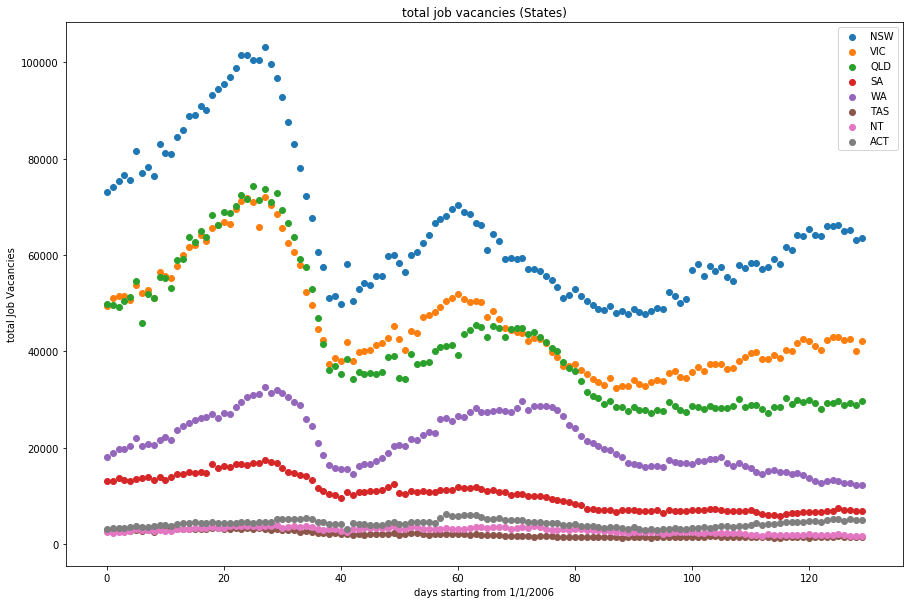

In [0]:
#plotting data
fig5, ax = plt.subplots(1,1, figsize=(15,10))

#plot seperate for each state using loop
for col in job.columns[1:]:
    ax.scatter(job.index, job[col])

#customising plot
ax.legend(job.columns[1:], loc='upper right')
#to view graphs properly increase xlim for legend
ax.set_title('total job vacancies (States)')
ax.set_xlabel('days starting from 1/1/2006')
ax.set_ylabel('total Job Vacancies')

#### a. What are the maximum and minimum values for job vacancies in Victoria over the period?

In [0]:
#print max and min values
print('Max:{}, Min:{}'.format(job.VIC.max(), job.VIC.min()))

Max:71971.4, Min:32322.2


The Max value for job vacancies in Victoria is 71972 while the Min job vacancies is 32323. The vacancies have been rounded up to the closest integer value.

#### 3. Fit a linear regression to the data and plot it.

In [0]:
#creating a lin regression
slope, intercept, rvalue, pvalue, stderr = linregress(job.index, job.VIC)
lin = [slope*x + intercept for x in job.index]

Text(0,0.5,'Job Vacancies')

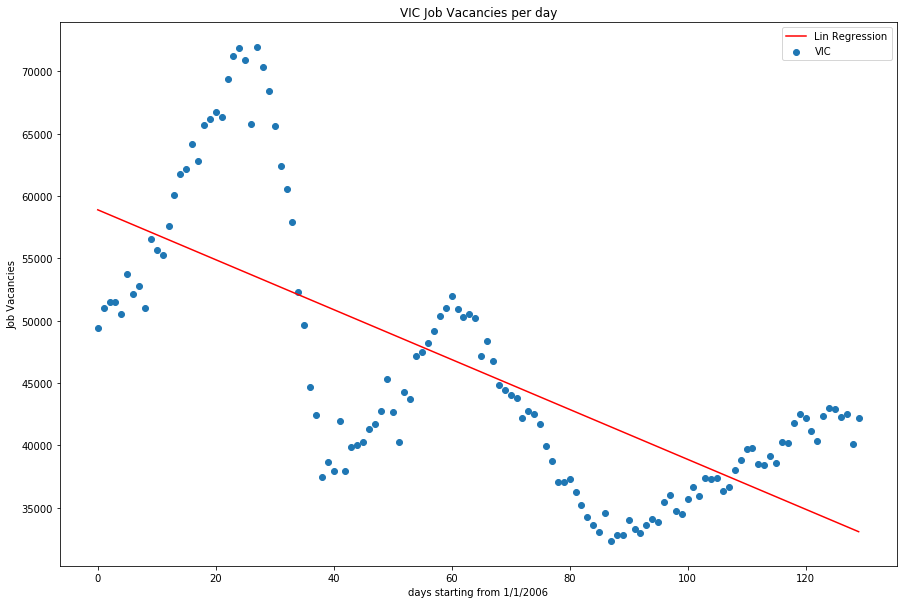

In [0]:
#creating a plot
fig6, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(job.index, job.VIC, label='VIC')
ax.plot(job.index, lin, 'r-', label='Lin Regression')

#customise plot
ax.legend(loc='upper right')
ax.set_title('VIC Job Vacancies per day')
ax.set_xlabel('days starting from 1/1/2006')
ax.set_ylabel('Job Vacancies')

##### a. Does it look like a good fit to you? Would you believe the predictions of the linear model going forward?

Although the lin regression can show us the general trend of decrease in the total job vacancies in Victoria it does not seem to fully predict the values of the job vacancies as the data seems to be following an oscillating path. 

No, I would believe the predictions of the linear model above as we can see in the plot the job vacancies do not follow a linear path and hence a linear regression cannot possibly predict the job vacancy values correctly. More variable are needed to fully predict the job vacancy values from the date 1/1/2006. 

#### 4. Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from the 90th data point onwards.)

In [0]:
#creating a lin regression for dates from the 90th data point
slope, intercept, rvalue, pvalue, stderr = linregress(job.index[90:], job.VIC.iloc[90:,])
lin = [slope*x + intercept for x in job.index[90:]]

Text(0,0.5,'Job Vacancies')

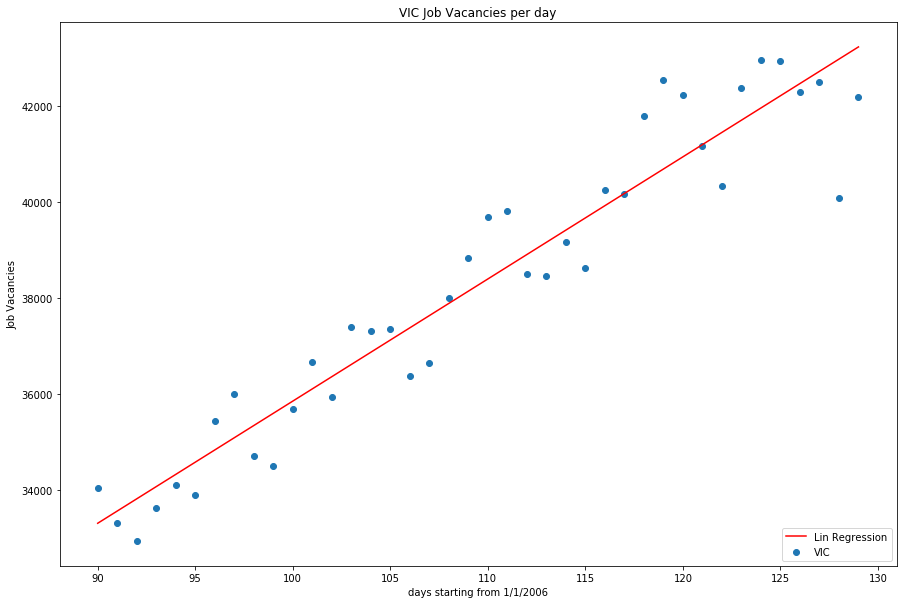

In [0]:
#recreating plot for the desired range

#creating a plot
fig7, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(job.index[90:], job.VIC.iloc[90:,], label='VIC')
ax.plot(job.index[90:], lin, 'r-', label='Lin Regression')

#customise plot
ax.legend(loc='lower right')
ax.set_title('VIC Job Vacancies per day')
ax.set_xlabel('days starting from 1/1/2006')
ax.set_ylabel('Job Vacancies')

##### a. How is the fit? Which model would give better predictions of future vacancies do you think?

In [0]:
rvalue

0.95483367307330214

I believe the regression for the restricted domain is a better fit. This is because although there is variation in the total job vacancies by day they follow a general increaing trend which can be captured by the linear regression model. 

The rvalue of the regression model is also quite high at 0.95 which shows that the model fits well on the job vacancy data (for the data points above 90).

In terms of predictions regarding future vacancies, the second model would (if lucky) be able to predict values in the short term. I say this because we can see in the previous plot the job data seems to oscillate between troughs and peaks and after an increase of 40 days in job data (since data point 90) it is quite possible that the job vacancies would soon start declining towards a trough. In that scenario the current model predictions would be totally disastrous and would depict a completely incorrect picture of the total job vacancies of Victoria. 

Another important take from this is that the second model has a positive slope which implies that the job vacanices are increasing with time which as we know is not the case (in the long term) as the general trend followed is that of a decrease in job vacancies.

In a much broader sense the previous regression would be able to capture  general long term prediction of the total job vacancies of the state of Victoria. Although the margin of error in the prediction would be quite high, it would still however be able to provide a general picture of a decrease in job vacancies as time increases. 

### A4. Investigating the Unemployment Data (5 marks)

#### 1. Create a data frame, including the dates.

In [0]:
#read in excel file and create dataframe
emp_ts = pd.read_excel('EmploymentTimeSeries.xls', sheetname = 'Time Series')
emp_ts.head()

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,n/a,6.773762,60.735313
1,NSW,1978-03-01,n/a,6.490161,59.851078
2,NSW,1978-04-01,63.7195,6.507978,60.168513
3,NSW,1978-05-01,63.682,6.115171,60.003564
4,NSW,1978-06-01,63.6829,6.424127,60.145380


#### 2. Plot the unemployment data of each university over time. You don't need to put the dates on the x-axis, just showing the index of each day is fine.

In [0]:
#checking the distict states data
emp_ts['State/Territory'].unique()

array(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'], dtype=object)

In [0]:
#check the columns names
emp_ts.columns

Index(['State/Territory', 'Date', 'Employment Rate (15-64)',
       'Unemployment Rate (15+)', 'Participation Rate (15+)'],
      dtype='object')

In [0]:
#pivot the data from its stacked version
unemp = emp_ts.pivot(index='Date', columns='State/Territory', values='Unemployment Rate (15+)')

In [0]:
unemp.head()

State/Territory,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
1978-02-01,5.716305,6.773762,7.657833,7.266082,7.076868,6.621015,5.956411,6.575607
1978-03-01,5.770590,6.490161,7.037714,7.279538,6.448651,6.197741,5.746178,5.971626
1978-04-01,5.805420,6.507978,6.378075,6.856476,6.499987,6.309658,5.575723,6.274599
1978-05-01,5.897355,6.115171,5.773537,7.161268,6.709422,6.220199,5.697610,6.328462
1978-06-01,6.052601,6.424127,5.273143,7.108727,6.833335,6.597852,5.517504,6.267387


In [0]:
#reset the index and delete the columns name
del unemp.columns.name
unemp.reset_index(inplace=True)

In [0]:
unemp.head()

,Date,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
0,1978-02-01,5.716305,6.773762,7.657833,7.266082,7.076868,6.621015,5.956411,6.575607
1,1978-03-01,5.770590,6.490161,7.037714,7.279538,6.448651,6.197741,5.746178,5.971626
2,1978-04-01,5.805420,6.507978,6.378075,6.856476,6.499987,6.309658,5.575723,6.274599
3,1978-05-01,5.897355,6.115171,5.773537,7.161268,6.709422,6.220199,5.697610,6.328462
4,1978-06-01,6.052601,6.424127,5.273143,7.108727,6.833335,6.597852,5.517504,6.267387


Text(0.5,1,'Unemployement Rate (15+) Time Series')

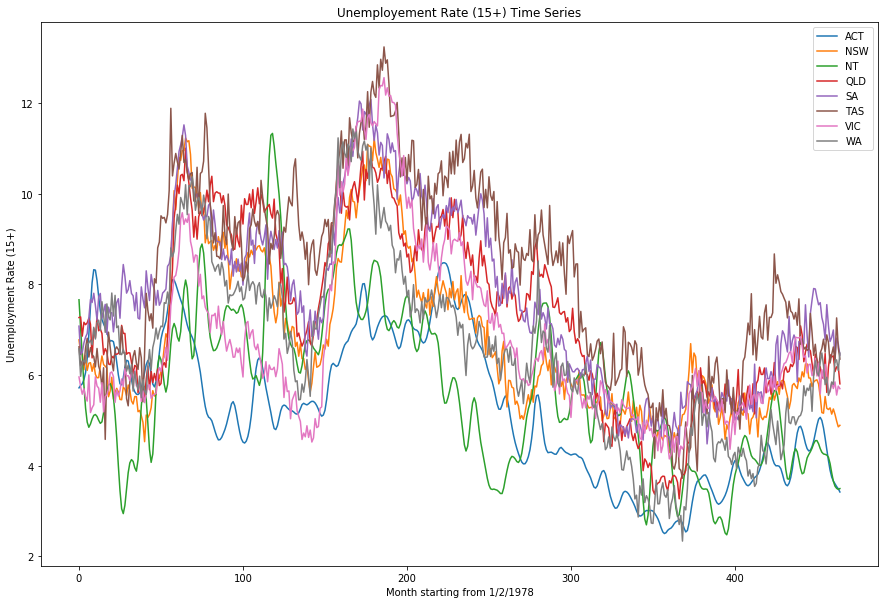

In [0]:
#create plot
fig8, ax = plt.subplots(1,1, figsize=(15,10))

#create plot for each state seperately
for col in unemp.columns[1:]:
    ax.plot(unemp.index, unemp[col], '-')

#customise plot
ax.legend(unemp.columns[1:])
ax.set_xlabel('Month starting from 1/2/1978')
ax.set_ylabel('Unemployment Rate (15+)')
ax.set_title('Unemployement Rate (15+) Time Series')

##### a. What was the maximum unemployment rate in Victoria recorded in the dataset? 

##### b. When did that occur?

In [0]:
#calculate max unemployement rate for VIC and show it with the date column
unemp[unemp['VIC'] == unemp['VIC'].max()][['Date', 'VIC']]

,Date,VIC
186,1993-08-01,12.553338


Ans a,b)

The highest unemployement rate in the state of VIC was 12.5533% on the date 08/01/1993

### A5. Investigating the Graduate Employment Data (5 marks) 

#### 1. Create a data frame. Include the dates.

In [0]:
#read in data and create dataframe
gemp = pd.read_excel('GraduateEmploymentTimeSeries.xls', sheetname='Time Series')
gemp.head()

,University,Date,Graduate Employment Rate (< 3 months post-graduation),Graduate Unemployment Rate (< 6 months)
0,UNSW,1978-02-01,62.1,14.563587
1,UNSW,1978-03-01,63.4,13.953846
2,UNSW,1978-04-01,63.7195,13.992152
3,UNSW,1978-05-01,63.682,13.147617
4,UNSW,1978-06-01,63.6829,13.811873


In [0]:
#check unique states in data
gemp.University.unique()

array(['UNSW', 'Monash', 'UQ', nan, 'UWA', 'AU', 'ANU', 'Uni Melb', 'USYD'], dtype=object)

#### 2. Plot the unemployment data of each university over time. You don't need to put the dates on the x-axis, just showing the index of each day is fine.

checking duplicates: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html

In [0]:
#getting error of duplicates on pivot ; check for duplicates; keep False so to check all values
dup = gemp[gemp.duplicated(keep=False)]
dup.head()

,University,Date,Graduate Employment Rate (< 3 months post-graduation),Graduate Unemployment Rate (< 6 months)
1395,NaN,NaT,NaN,NaN
1396,NaN,NaT,NaN,NaN
1397,NaN,NaT,NaN,NaN
1398,NaN,NaT,NaN,NaN
1399,NaN,NaT,NaN,NaN


In [0]:
#check if all are NaN in Date; since Date is what matters 
dup.Date.unique()

array(['NaT'], dtype='datetime64[ns]')

dropping duplicates: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html

In [0]:
#delete duplicates as they are all empty; dont keep any 
gemp.drop_duplicates(keep=False, inplace=True)

In [0]:
#pivot data since duplicates are removed
gunemp = gemp.pivot(index='Date', columns='University', values='Graduate Unemployment Rate (< 6 months)')
gunemp.head()

University,ANU,AU,Monash,UNSW,UQ,USYD,UWA,Uni Melb
Date,,,,,,,,
1978-02-01,NaN,NaN,19.417899,14.563587,19.400440,NaN,NaN,NaN
1978-03-01,NaN,NaN,18.732541,13.953846,19.436366,NaN,NaN,NaN
1978-04-01,NaN,NaN,18.176858,13.992152,18.306792,NaN,NaN,NaN
1978-05-01,NaN,NaN,18.574208,13.147617,19.120586,NaN,NaN,NaN
1978-06-01,NaN,NaN,17.987061,13.811873,18.980300,NaN,NaN,NaN


In [0]:
#reset index and remove columns name
del gunemp.columns.name
gunemp.reset_index(inplace=True)
gunemp.head()

,Date,ANU,AU,Monash,UNSW,UQ,USYD,UWA,Uni Melb
0,1978-02-01,NaN,NaN,19.417899,14.563587,19.400440,NaN,NaN,NaN
1,1978-03-01,NaN,NaN,18.732541,13.953846,19.436366,NaN,NaN,NaN
2,1978-04-01,NaN,NaN,18.176858,13.992152,18.306792,NaN,NaN,NaN
3,1978-05-01,NaN,NaN,18.574208,13.147617,19.120586,NaN,NaN,NaN
4,1978-06-01,NaN,NaN,17.987061,13.811873,18.980300,NaN,NaN,NaN


In [0]:
#check if NaN columns have any values or not
check = [gunemp[col].unique() for col in gunemp.columns[1:] if col not in ['Date', 'Monash', 'UQ', 'UNSW']]
check

[array([ nan]), array([ nan]), array([ nan]), array([ nan]), array([ nan])]

#### 2. Plot the unemployment data of each university over time. You don't need to put the dates on the x-axis, just showing the index of each day is fine.

Text(0.5,1,'Graduate Unemployement Univwersity Wise - Time Series')

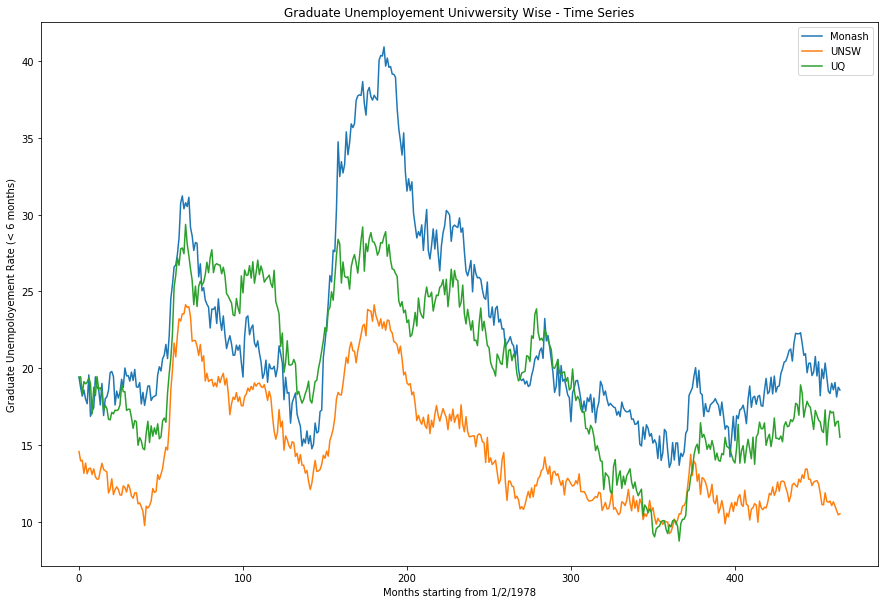

In [0]:
#only plotting the columns with values
fig9, ax = plt.subplots(1,1, figsize=(15,10))
Mon = ax.plot(gunemp.index, gunemp.Monash, label='Monash')
UNSW = ax.plot(gunemp.index, gunemp.UNSW, label='UNSW')
UQ = ax.plot(gunemp.index, gunemp.UQ, label='UQ')

#customise plot
ax.legend()
ax.set_xlabel('Months starting from 1/2/1978')
ax.set_ylabel('Graduate Unempoloyement Rate (< 6 months)')
ax.set_title('Graduate Unemployement Univwersity Wise - Time Series')

##### a. What do you notice about this graph in comparison to your other investigations?

##### b. What conclusions can you draw from this?

Ans a,b)

i. 

The graduate unemployement rate for individual universities follows the same pattern as that of overall unemployment rates for different states of Australia.

ii. 

The trend of unemployment is the same for the three universities even though they are present in different states. 


iii. 

Unemployment rates for Monash is higher than the University of Queensland which is futher higher than UNSW. This could be explained by the difference in poppulations, enrollment and job vacancies in these states. 

Monash has the highest enrolmenent amongst all other B8 universities, but the job vacancies in VIC are not as high as compared to other states and hence the graduate unemployement of Monash tends to be higher that others. 

NSW has the highest job vacancies compared to the rest of the states and since enrolment in UNSW is also low the graduate unemeployement rate is the lowest compared to Monash and UQ as there is a high probablity that the university graduates would secure a job. 

The graduate unemployement rate of UQ tends to remain in the middle of those of Monash and UNSW despite a few fluctuations of reaching the highest at one point and the lowest at another. Although the population in Queensland is the lowest compared to the other two states, the fact that job vacancies in it are comparitively at the same level as that of Victoria would tend to easily absorb the graduates due to the low enrolment in the University of Queensland. 

### A6. Visualising the Relationship between Unemployment and Job Vacancies (12 marks)

#### 1. Combine the data from the different files into a single table. The table should contain population values, job vacancy counts and unemployment rates for all of the different dates and different States/Territories.

In [0]:
pop.head(1)

,Date,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505


In [0]:
job.head(1)

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2006-01-01,73047.8,49399.3,49807.5,13111.4,18087.6,2895.0,2563.0,3165.3


In [0]:
unemp.head(1)

,Date,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
0,1978-02-01,5.716305,6.773762,7.657833,7.266082,7.076868,6.621015,5.956411,6.575607


In [0]:
#change pop data columns to match others; order of the columns is the same so we can just copy paste column names
pop.columns = job.columns

In [0]:
pop.head(1)

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505


Merging Dataframes: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

Sorting Values in Dataframes: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [0]:
#convert pop data into stack form
pop_m = pd.melt(pop, id_vars = 'Date', value_vars = pop.columns[1:], var_name = 'State', value_name = 'Population')
pop_m.head()

,Date,State,Population
0,2005-12-01,NSW,6718023
1,2006-03-01,NSW,6735528
2,2006-06-01,NSW,6742690
3,2006-09-01,NSW,6766133
4,2006-12-01,NSW,6786160


In [0]:
#convert job data in stack form
job_m = pd.melt(job, id_vars = 'Date', value_vars = job.columns[1:], var_name = 'State', value_name = 'Job Vacancies')
job_m.head()

,Date,State,Job Vacancies
0,2006-01-01,NSW,73047.8
1,2006-02-01,NSW,73995.0
2,2006-03-01,NSW,75246.3
3,2006-04-01,NSW,76539.8
4,2006-05-01,NSW,75614.9


In [0]:
#convert unemp data into stack form
unemp_m = pd.melt(unemp, id_vars = 'Date', value_vars = unemp.columns[1:], var_name = 'State', value_name = 'Unemployement Rate')
unemp_m.sort_values('Date').head()

,Date,State,Unemployement Rate
0,1978-02-01,ACT,5.716305
2790,1978-02-01,VIC,5.956411
3255,1978-02-01,WA,6.575607
465,1978-02-01,NSW,6.773762
2325,1978-02-01,TAS,6.621015


In [0]:
#merge data for pop and job SQL style; inner join as we only want to keep dates that are common 
full_data = pd.merge(pop_m, job_m, how='inner', on=['Date', 'State'], sort=True)

In [0]:
#merge data for all SQL style; inner join as we only want to keep dates that are common
full_data = pd.merge(full_data, unemp_m, how='inner', on=['Date', 'State'], sort=True)

In [0]:
#check if data has been merged correctly
full_data.head()

,Date,State,Population,Job Vacancies,Unemployement Rate
0,2006-03-01,ACT,334299,3473.9,3.254369
1,2006-03-01,NSW,6735528,75246.3,4.978780
2,2006-03-01,NT,208347,2485.0,5.765331
3,2006-03-01,QLD,3987653,49233.0,4.705125
4,2006-03-01,SA,1550135,13669.6,5.035000


##### a. What is the first date and last date for the combined data?

In [0]:
#check first row; data is sorted according to Date and state while merging so first row has the first date
full_data.head(1)

,Date,State,Population,Job Vacancies,Unemployement Rate
0,2006-03-01,ACT,334299,3473.9,3.254369


In [0]:
#check last row; data is sorted according to Date and state while merging so last row has the last date
full_data.tail(1)

,Date,State,Population,Job Vacancies,Unemployement Rate
303,2015-06-01,WA,2591585,15222.9,6.003158


The first date is 1/3/2006 and the last date is 1/6/2015

#### 2. Now that you have the data aggregated, we can see whether there is a relationship between unemployment and the number of job vacancies. Plot the values against each other.

Text(0.5,1,'Job Vacancies vs Unemployement Rate')

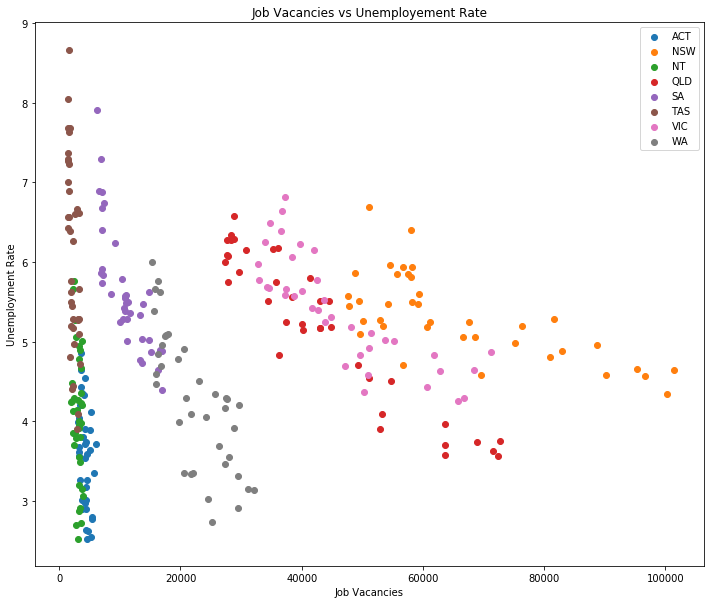

In [0]:
#create plot
fig11, ax = plt.subplots(1,1, figsize=(12,10))

#view plots according to different states
for state in full_data.State.unique():
    #full_data[full_data['State'] == state; filters dataframe to give rows only for the state currently in loop
    ax.scatter(full_data[full_data['State'] == state]['Job Vacancies'], full_data[full_data['State'] == state]['Unemployement Rate'], label=state)
    
#customise plot
ax.legend()
ax.set_xlabel('Job Vacancies')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Job Vacancies vs Unemployement Rate')

Twin Axis Plotting : https://python4astronomers.github.io/plotting/advanced.html

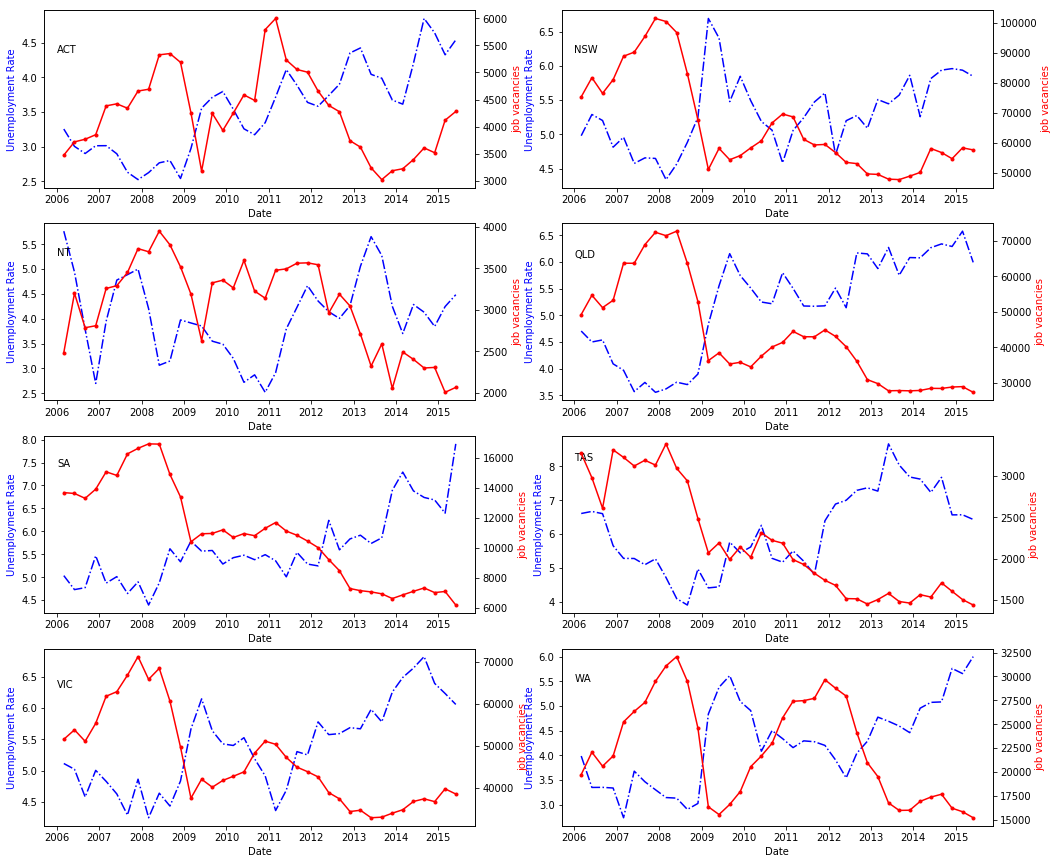

In [0]:
#view plots against time to view relationship for all states seperately. 

#create plot for each individual state with new xlimit
fig14 = plt.figure(figsize=(17, 15))

#run loop for each state
i=1 #identifier for subplot
for state in full_data.State.unique():
    
    #create 8 subplots and tag current subplot as a new one
    ax1 = fig14.add_subplot(4,2,i)
    ax2 = ax1.twinx()
    
    #plot 2 plots data in the subplot in loop
    #The code "full_data[full_data['State'] == state]" filters the stacked data frame to only get data from the state in the loop
    ax1.plot(full_data[full_data['State'] == state]['Date'], full_data[full_data['State'] == state]['Unemployement Rate'], 'b-.')
    ax2.plot(full_data[full_data['State'] == state]['Date'], full_data[full_data['State'] == state]['Job Vacancies'], 'r.-')
    
    #customise
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Unemployment Rate', color='blue')
    ax2.set_ylabel('job vacancies', color='red')
    
    #tag graph with text
    #find unemployement max
    unemp_max = full_data[full_data['State'] == state]['Unemployement Rate'].max()
    #tag just below that height
    ax1.text('2006-01-01', unemp_max-0.5, state)
    
    #increment value for next subplot
    i += 1


##### b. Can you see a relationship there? Is the relationship clear?

As expected, there seems to be an inverse relationship between the Unemployement rate and job vacancies. The relationship although some what clear seems to vary interms of the rate of change between the some states; some states unemeployement rates seems to change quite quickly on changes to job vacancies while others are a bit slow in responding. This could be due to the differences between the populations of the states and the number of job vacancies required to fully finish the unemployed work force.

#### 3. Select and plot only the data from Victoria.

Text(0.5,1,'Job Vacancies vs Unemployement Rate')

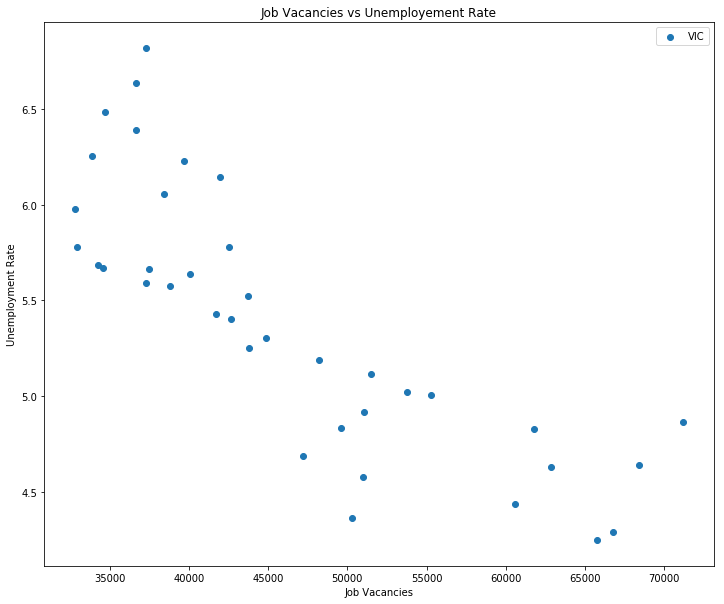

In [0]:
#create plot
fig11, ax = plt.subplots(1,1, figsize=(12,10))
ax.scatter(full_data[full_data['State'] == 'VIC']['Job Vacancies'], full_data[full_data['State'] == 'VIC']['Unemployement Rate'], label='VIC')

#customise plot
ax.legend()
ax.set_xlabel('Job Vacancies')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Job Vacancies vs Unemployement Rate')

##### c. Can you see a relationship now? If so, describe this relationship based on the graph?

The relationship seems to be much clearer. As expected there is an inverse relationship between the Job Vacancies and the unemployment rate in the State of Victoria. Which implies that as the number of job vacancies increase in the state the level of unemployment also decreased. In the graph this can be seen as when the job vacancies tend to rise towards a peak the unemployement rate tends to decrease towards a trough simultaniously. 

#### 4. The different populations of the states will influence the number of job vacancies in each. Remove this effect by introducing a new column called 'Vacancy Rate' which contains the vacancy count divided by the population size, multiplied by 100 (2 marks).

In [0]:
#adding another columns to dataframe
full_data['Vacancy Rate'] = (full_data['Job Vacancies']/full_data['Population'])*100

In [0]:
full_data.head(1)

,Date,State,Population,Job Vacancies,Unemployement Rate,Vacancy Rate
0,2006-03-01,ACT,334299,3473.9,3.254369,1.03916


#### 5. Re-plot the new data. 

Text(0.5,1,'Job Vacancies vs Unemployement Rate')

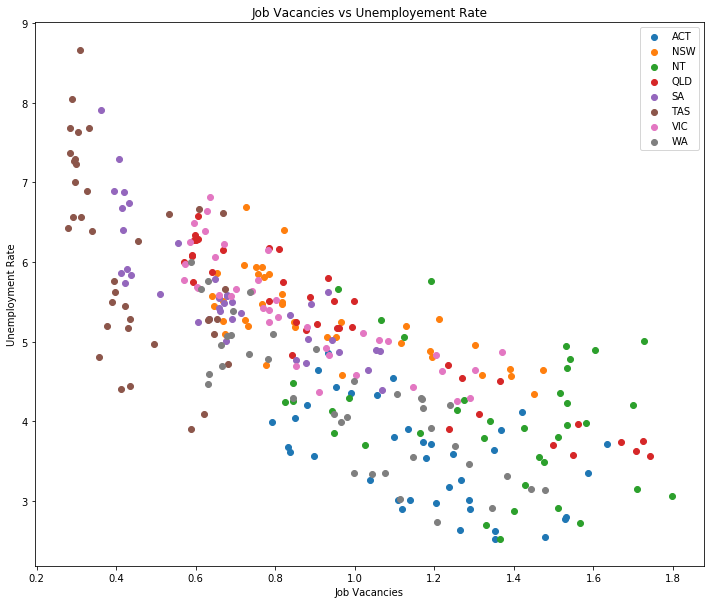

In [0]:
#create plot
fig11, ax = plt.subplots(1,1, figsize=(12,10))

#view plots according to different states
for state in full_data.State.unique():
    #full_data[full_data['State'] == state; filters dataframe to give rows only for the state currently in loop
    ax.scatter(full_data[full_data['State'] == state]['Vacancy Rate'], full_data[full_data['State'] == state]['Unemployement Rate'], label=state)
    
#customise plot
ax.legend()
ax.set_xlabel('Job Vacancies')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Job Vacancies vs Unemployement Rate')

In [0]:
full_data.State.unique()

array(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], dtype=object)

change plot size: https://stackoverflow.com/questions/29589119/plot-width-settings-in-ipython-notebook

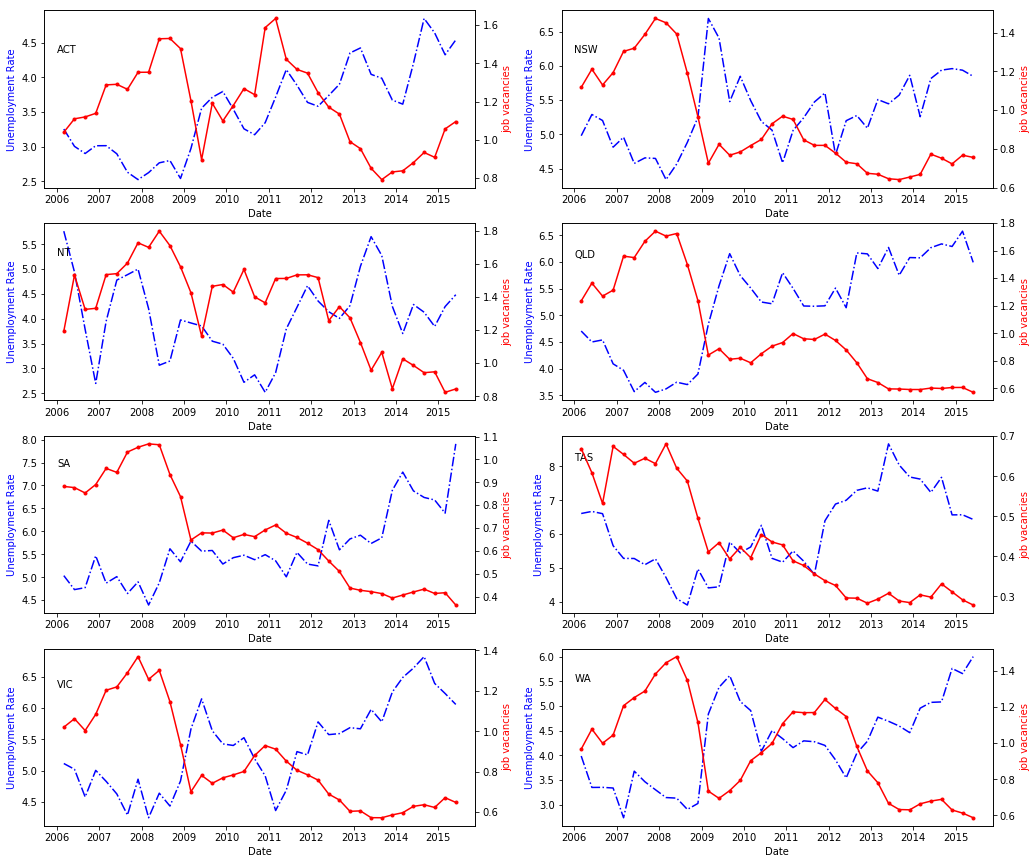

In [0]:
#view plots against time to view relationship for all states seperately. 

#create plot for each individual state with new xlimit
fig14 = plt.figure(figsize=(17, 15))

#run loop for each state
i=1 #identifier for subplot
for state in full_data.State.unique():
    
    #create 8 subplots and tag current subplot as a new one
    ax1 = fig14.add_subplot(4,2,i)
    ax2 = ax1.twinx()
    
    #plot 2 plots data in the subplot in loop
    #The code "full_data[full_data['State'] == state]" filters the stacked data frame to only get data from the state in the loop
    ax1.plot(full_data[full_data['State'] == state]['Date'], full_data[full_data['State'] == state]['Unemployement Rate'], 'b-.')
    ax2.plot(full_data[full_data['State'] == state]['Date'], full_data[full_data['State'] == state]['Vacancy Rate'], 'r.-')
    
    #customise
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Unemployment Rate', color='blue')
    ax2.set_ylabel('job vacancies', color='red')
    
    #tag graph with text
    #find unemployement max
    unemp_max = full_data[full_data['State'] == state]['Unemployement Rate'].max()
    #tag just below that height
    ax1.text('2006-01-01', unemp_max-0.5, state)
    
    #increment value for next subplot
    i += 1



##### a. Is there a relationship between the unemployment rate and the job vacancy rate across all the data?

The Vacancy Rate seems to also follow an inverse relationship with the unemployement rate for all the states. The rate of change between all other states seems to be the same as well one the difference in population has been countered for. 

### A7. Visualising the Relationship over Time (8 marks)

#### 1. Build a Motion Chart comparing the job vacancy rate, the unemployment rate, and the population of each state over time. The motion chart should show the job vacancy rate on the x-axis, the unemployment rate on the y-axis and the bubble size should depend on the population.

In [0]:
#import motionChart from motionchart library
from motionchart.motionchart import MotionChart 

mChart = MotionChart(df = sampleData, key='Time', x='GDP', y='Life Expectancy', xscale='linear', yscale='linear',
                     size='Population', color='Region', category='Countries')

mChart.to_notebook()

In [0]:
#creating dataframe Deep copy for motion chart so to chart 'Date' format for mChart key
full_data_mchart = full_data.copy()
full_data_mchart['Date'] = full_data_mchart['Date'].dt.strftime('%d-%m-%Y')
full_data_mchart.head()

,Date,State,Population,Job Vacancies,Unemployement Rate,Vacancy Rate
0,01-03-2006,ACT,334299,3473.9,3.254369,1.039160
1,01-03-2006,NSW,6735528,75246.3,4.978780,1.117155
2,01-03-2006,NT,208347,2485.0,5.765331,1.192722
3,01-03-2006,QLD,3987653,49233.0,4.705125,1.234636
4,01-03-2006,SA,1550135,13669.6,5.035000,0.881833


In [0]:
#create motion chart 
mChart = MotionChart(df = full_data_mchart, key='Date', x='Vacancy Rate', y='Unemployement Rate', xscale='linear', yscale='linear', size='Population', color='State', category='State')
mChart.to_notebook()

#### 2. Run the visualisation from start to finish. 

##### a. Which state has the lowest job vacancy rate?

TAS.

##### b. Is the economy getting better or worse? I.e. was the Australian economy better in 2006/7 or 2014/5?

In my opinion the economy is getter worse as the years pass by as the unemployement rate for the states is increasing and the vacancy rate seems to be decreasing over time. 

The Australian economy seemed to be better in 2006/7 compared to 2014/5.

##### c. Compared to the states, does the Northern Territory have higher or lower unemployment and higher or lower job vacancy rates?

The vacancy rates for the northern teritory compared to the states has been higher in general with it being surpased by QLD at one point. At the end however the vacancy rate of ACT was higher compared to the NT. 

The Unemployment rate in the NT has been constantly fluctuating when compared to the states' as the unemployment rate in NT has been higher during some years while it was lower in other. In general however the unemployment rate been more towards the lower side compared to the other Australian States. 

##### d. What might cause this? Would it make sense economically to move to NT? 

Text(0.5,1,'Quarter vs Population of Aus States')

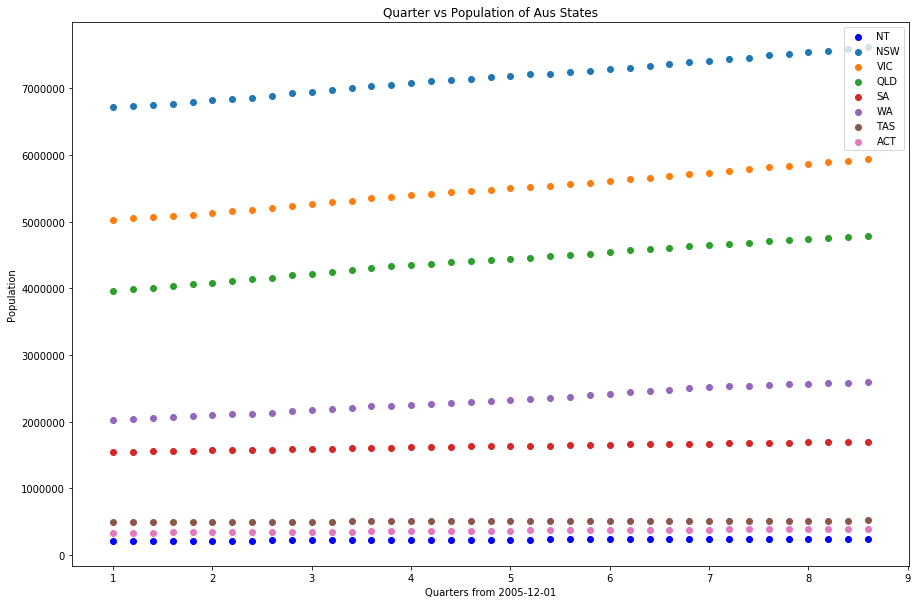

In [0]:
#checking the population of NT compared to the other states. 
fig15, ax = plt.subplots(1,1, figsize=(15,10))

#plot NT in blue
ax.scatter(pop.index, pop['NT'], color='blue')

#plot all other states
for col in list(pop.columns[1:-2]) + list(pop.columns[-1:]):
    ax.scatter(pop.index, pop[col])

#customise plot
ax.set_xticklabels(pop.index)
ax.legend(loc='upper right')
ax.set_ylabel('Population')
ax.set_xlabel('Quarters from 2005-12-01')
ax.set_title('Quarter vs Population of Aus States')

The population count in NT is the lowest compared to all other states while the job vacancies are lower they are enough to absorb the work force. This causes the vacancy rate to be quite higher compared to other states of Australia. since the unemeployment rate is inversly proportional to the job vacancy rate the unemployement rate tends to be higher than the other states aswell. 

Economically, having the lowest population count in the Northern state with no University from the B8 located in that state means the level of jobs and opportunities would not be at par with those in the other states. Hence moving to NT just based on high vacancy rate and low unemployment does not make sense, and would be unwise. 

##### e. According to the graph, what happened at the end of 2008 and start of 2009? What might have caused this?

According to the graph the Vacancy rate declined for all the states while their unemployment rate rose. This could have been the affect of the global financial crises and its resulting great ression and the global economic turndown during this time.

##### f. Any other interesting things you notice in the data?

i. 

TAS has had the worst economy amongst all other states through out. 

ii.

ACT and NT were least affected by the global financial crises while economies of other states were more seriously hit. 

iii. 

VIC, NSW, QLD, and WA have some what similar economies as their economies tend to behave the same and have similar job vacancy and unemployment rate. Amongst these VIC and NSW economies tend to be linked the closest most probably due to the similarities in population, job vacancies and enrolment rates. 

## Task B: Exploratory Analysis on Big Data (32 Marks total)

### B1. Summarising the Data (9 marks)

In [0]:
#create dataframe from insurance rates csv
ins_rates = pd.read_csv('InsuranceRates.csv')

In [0]:
#overall summary of data
ins_rates.describe()

,BusinessYear,IssuerId,IndividualRate,IndividualTobaccoRate
count,1.269444e+07,1.269444e+07,1.269444e+07,4.932349e+06
mean,2.015034e+03,5.248592e+04,4.098026e+03,5.436911e+02
std,7.940521e-01,2.641263e+04,6.122271e+04,2.945916e+02
min,2.014000e+03,1.004600e+04,0.000000e+00,4.173000e+01
25%,2.014000e+03,3.021900e+04,2.933000e+01,3.391200e+02
50%,2.015000e+03,4.953200e+04,2.916000e+02,4.632900e+02
75%,2.016000e+03,7.652600e+04,4.789800e+02,6.843900e+02
max,2.016000e+03,9.996900e+04,9.999990e+05,6.604610e+03


In [0]:
#check datatypes of columns
ins_rates.dtypes

BusinessYear               int64
StateCode                 object
IssuerId                   int64
PlanId                    object
Age                       object
IndividualRate           float64
IndividualTobaccoRate    float64
dtype: object

#### 1. Now answer the following questions:

##### a. What are the possible values for 'Age'?

In [0]:
#take out unique age values
ins_rates.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

All possible values for Age are '0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64',and '65 and over'

###### b. How many states are there?

In [0]:
#take out count of unique states
ins_rates.StateCode.nunique()

39

There are a total of 39 States in this Data. 

##### c. How many rows and columns are there?

In [0]:
#check the size of data, rows/columns
ins_rates.shape

(12694445, 7)

There are 12694445 rows and 7 columns.

##### d. How many years does the data cover? (Hint: pandas provides functionality to see unique' values.)

In [0]:
#count number of unique business years
ins_rates['BusinessYear'].nunique()

3

The data covers a total of 3 business years.

##### e. How many unique ‘PlanId’s are there?

In [0]:
#take out number of unique Plan Ids
ins_rates.PlanId.nunique()

16808

16808 unique Plan Ids are present. 

##### f. What are the average, maximum and minimum values for the monthly insurance premium cost for an individual?

In [0]:
#print mean(), max() and min() of individual rates
print('The values are as follows: Average:{}, Maximum:{}, and Minimum:{}'.format(ins_rates.IndividualRate.mean(), ins_rates.IndividualRate.max(), ins_rates.IndividualRate.min()))

The values are as follows: Average:4098.026458581588, Maximum:999999.0, and Minimum:0.0


##### g. Do those values seem reasonable to you?

There is a huge difference between the Maximum and the minimum values from the average and I feel the maximum value is way too hig from the average. But since the average is quite low it would seem that a maximum of 999999 would be a very rare case. 

##### h. How many rows that have a non-empty ‘IndividualTobaccoRate’ are there?

filtering not null rows: https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/

In [0]:
#filter dataframe so that rows with values in tobacco using rates and select row count
ins_rates[ins_rates.IndividualTobaccoRate.notnull()].shape[0]

4932349

There are 4932349 rows with non-empty Individual Tobacco Rate entries. 

##### i. Among these rows, how much more on average do smokers pay for their insurance?

In [0]:
#create new df with filtered rows; find diff and take out mean 
df = ins_rates[ins_rates.IndividualTobaccoRate.notnull()]
(df.IndividualTobaccoRate - df.IndividualRate).mean()

88.90566067009055

On average smokers pay $88.91 more compared to non smokers.

### B2. Investigating Individual Insurance Costs (7 marks)

#### 1. Show the distribution of ‘IndividualRate’ values using a histogram.

Text(0,0.5,'Density')

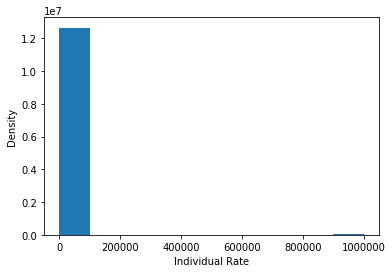

In [0]:
#create plot
fig16, ax = plt.subplots()

ax.hist(ins_rates.IndividualRate)

#customise plot
ax.set_xlabel('Individual Rate')
ax.set_ylabel('Density')

In [0]:
#check data to check if graph seems correct
ins_rates['IndividualRate'].value_counts(sort=True)

0.000000         682484
99.990000         87941
999999.000000     47790
99.000000         36455
1.500000          24660
9999.000000       23580
18.490000         15032
25.680000         13499
21.990000         13179
36.300000         11420
35.000000         11141
33.100000         10670
27.000000         10427
29.000000         10307
23.130000          9797
33.470000          9388
24.610000          9280
27.930000          9094
38.000000          8603
20.990000          8445
29.990000          8377
17.990000          8344
38.040000          8319
100.000000         8205
21.110000          8060
22.490000          7887
17.490000          7853
39.120000          7769
25.490000          7686
17.750000          7606
                  ...  
1478.270000           1
1479.020000           1
1479.520000           1
1480.230000           1
1472.520000           1
1473.020000           1
1522.770000           1
1521.270000           1
1517.980000           1
1534.730000           1
1506.520000     

##### a. Does the distribution make sense to? What might be going on?

The distribution does not make sense. This could be due to the face that the data seems be be skewed towards zero. Also this could possibly be caused by outliers or in order to view the data better the number of bins would have to be increased immensly. 

#### 2. Remove rows with insurance premiums of 0 (or less) and over 2000. (Use this data from now on.) Generate a new histogram with a larger number of bins (say 200).

In [0]:
#filter data according to requirements
ins_rates = ins_rates[(ins_rates['IndividualRate']>0) & (ins_rates['IndividualRate']<=2000)]
ins_rates.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


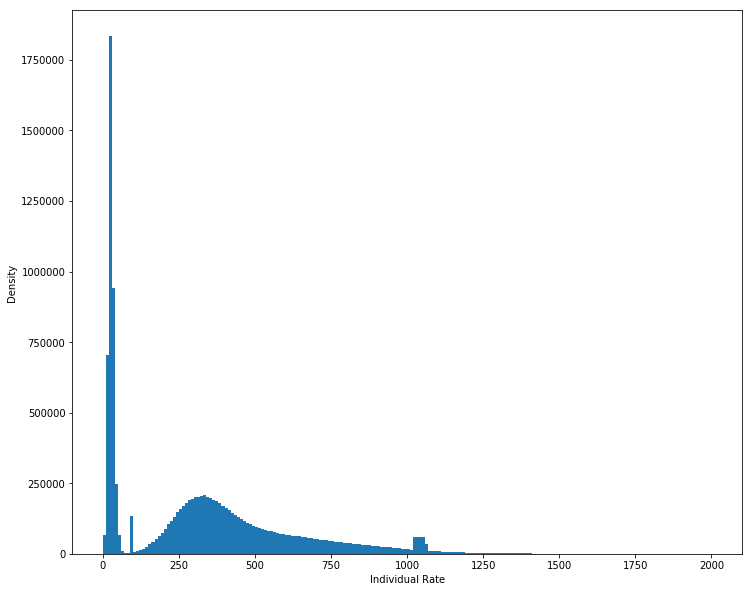

In [0]:
#plot graph
fig16, ax = plt.subplots(figsize=(12,10))

ax.hist(ins_rates.IndividualRate, bins=200)

#customise plot
ax.set_xlabel('Individual Rate')
ax.set_ylabel('Density')

plt.show()

##### a. Does this data look more sensible?

The data does look more sensible after increasing the bin size and the removing the outliers. The plot now clearly shows where the data is most dense.

##### b. Describe the data. How many groups can you see?

There seems to be a large frequency of data with low Individual Rates spanned over a very small range of values. While there also seems to be high frequency near the dollar value of $300 with the density spanned over a large range of dollar values. 

There seems to bee 3 groups of data with two groups having a much higher density compared to the third. 

### B3. Variation in Costs over Time and with Age (4 marks)

#### 1. Generate bar charts of insurance costs versus year and age.

In [0]:
ins_rates.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


In [0]:
#create df for bar plot for BusinessYear: Mean()
bar_byear = ins_rates[['BusinessYear', 'IndividualRate']].groupby('BusinessYear').mean()
bar_byear.reset_index(inplace=True)

#create df for bar plot for Age
bar_age = ins_rates[['Age', 'IndividualRate']].groupby('Age').mean()
bar_age.reset_index(inplace=True)

changing size of subplots within plots: https://matplotlib.org/users/gridspec.html

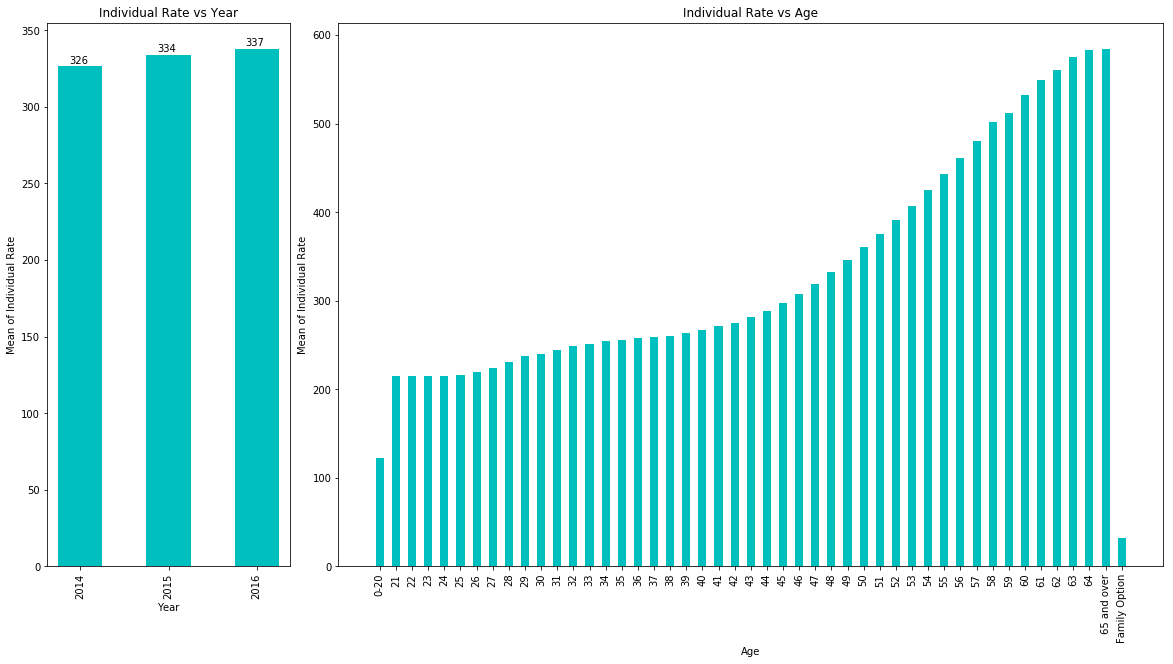

In [0]:
#create plot
fig16 = plt.figure(figsize=(20,10))

ax_byear = plt.subplot2grid((1,4), (0,0))
ax_age = plt.subplot2grid((1,4), (0,1), colspan=3)


#setting index and width of bars
ind_byear = np.arange(0,3,1)
ind_age = np.arange(0, 47, 1)
width = 0.5

#plots
    #plot for Business Year
ax_byear.bar(ind_byear, bar_byear['IndividualRate'], width, color='c')
    #plot for Age
ax_age.bar(ind_age, bar_age['IndividualRate'], width, color='c')

#customise plot

#customise byear 
ax_byear.set_xticks(ind_byear)
ax_byear.set_xticklabels(bar_byear['BusinessYear'], rotation='vertical')
ax_byear.set_xlabel('Year')
ax_byear.set_ylabel('Mean of Individual Rate')
ax_byear.set_title('Individual Rate vs Year')
#plot values over bars
for x,y in enumerate(bar_byear['IndividualRate']):
    ax_byear.text(x-.125,y+2,int(y))

#customise age plot
ax_age.set_title('Individual Rate vs Age')
ax_age.set_xticks(ind_age)
ax_age.set_xticklabels(bar_age.Age, rotation='vertical')
ax_age.set_xlabel('Age')
ax_age.set_ylabel('Mean of Individual Rate')

plt.show()

##### a. Are insurance policies becoming cheaper or more expensive over time? Is the median insurance cost increasing or decreasing?

The policies seem to be getting more expensive as the years increase. 

The median of the policies also seems to be increasing with years as seen in the graph below.

In [0]:
#create df for bar plot for BusinessYear: Median()
bar_byear = ins_rates[['BusinessYear', 'IndividualRate']].groupby('BusinessYear').median()
bar_byear.reset_index(inplace=True)

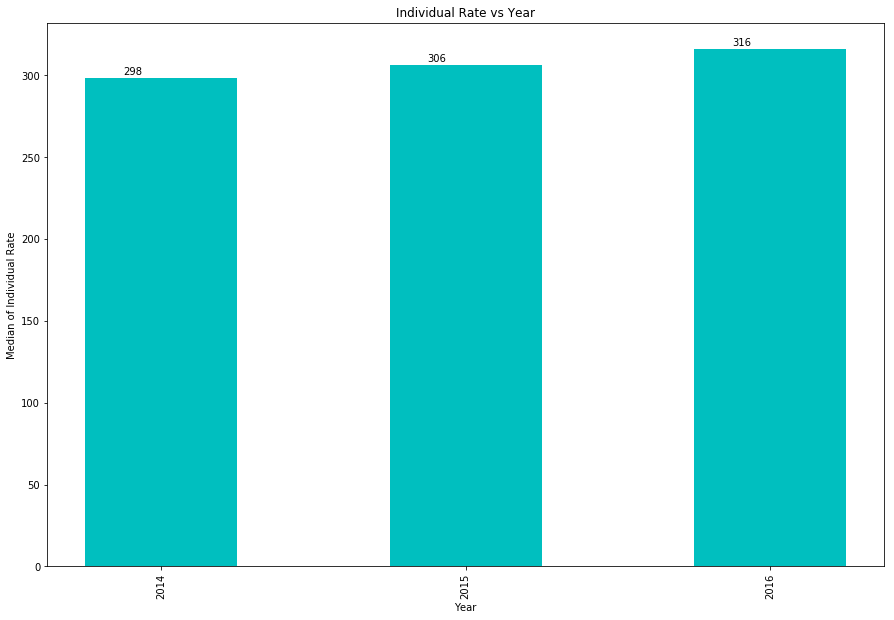

In [0]:
#create plot
fig17, ax_byear = plt.subplots(1, 1, figsize=(15,10))


#setting index and width of bars
ind_byear = np.arange(0,3,1)
width = 0.5

#plots
    #plot for Business Year
ax_byear.bar(ind_byear, bar_byear['IndividualRate'], width, color='c')

#customise plot
ax_byear.set_xticks(ind_byear)
ax_byear.set_xticklabels(bar_byear['BusinessYear'], rotation='vertical')
ax_byear.set_xlabel('Year')
ax_byear.set_ylabel('Median of Individual Rate')
ax_byear.set_title('Individual Rate vs Year')

#plot values over bars
for x,y in enumerate(bar_byear['IndividualRate']):
    ax_byear.text(x-.125,y+2,int(y))

plt.show()

##### b. How does insurance costs vary with the age of the person being insured? (Hint:filter out the value 'Family Option' before plotting the data.)

The insurance cost increase as the age of the individual increase.

### B4. Variation in Costs across States (12 marks)

#### 1. Generate a graph containing boxplots summarising the distribution of values for each state.

C:\Users\rizvi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


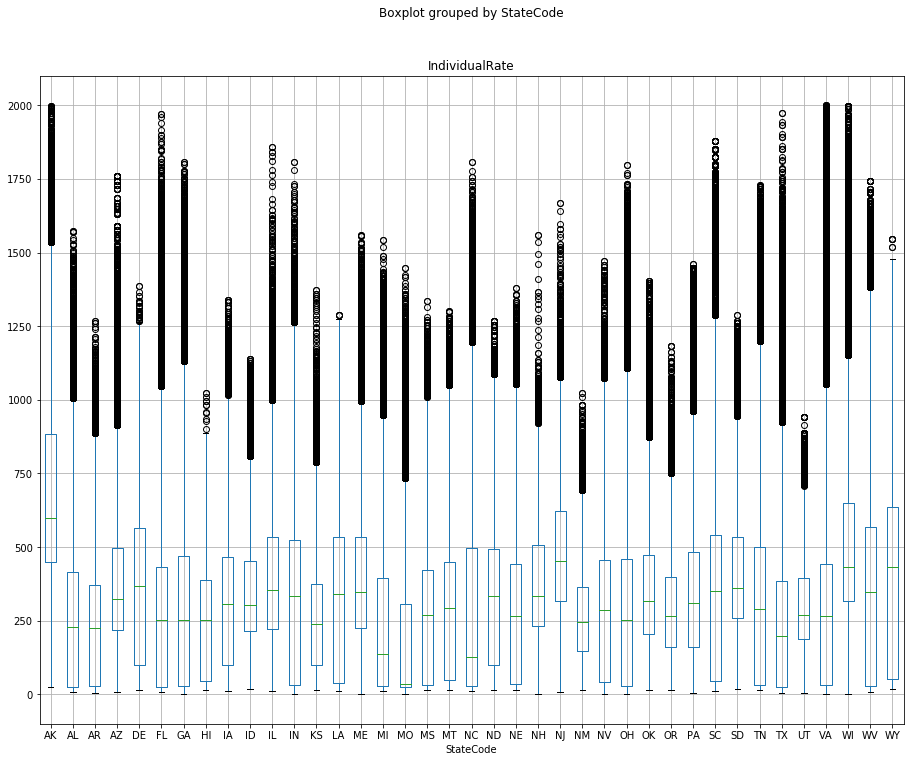

In [0]:
#fig17 = plt.figure(figsize=(15,10))
ins_rates.boxplot(column='IndividualRate', by='StateCode', figsize=(15,12))

##### a. What is the difference between the lowest and the highest median insurance rates?

In [0]:
#checked states with lowest and highest median from box plot

#store median for the states
AK_median = ins_rates[ins_rates['StateCode'] == 'AK']['IndividualRate'].median() 
MO_median = ins_rates[ins_rates['StateCode'] == 'MO']['IndividualRate'].median() 

#calculate the difference
diff_hi_lo = AK_median - MO_median
diff_hi_lo

561.9949999999999

The difference between the lowest and the highest Median insurance rates is $561.99.

#### 2. How does the number of insurance issuers vary across states?

##### a. Create a bar chart of the number of insurance companies in each state to see. (Hint: you will need to aggregate the data by state to do this.)

In [0]:
ins_rates.head(1)

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.0,NaN


In [0]:
#use group by to find number of issuers for each state
nbr_issuers = ins_rates.groupby('StateCode')['IssuerId'].nunique().sort_values()

In [0]:
#reset index to fix dataframe
nbr_issuers = nbr_issuers.reset_index()

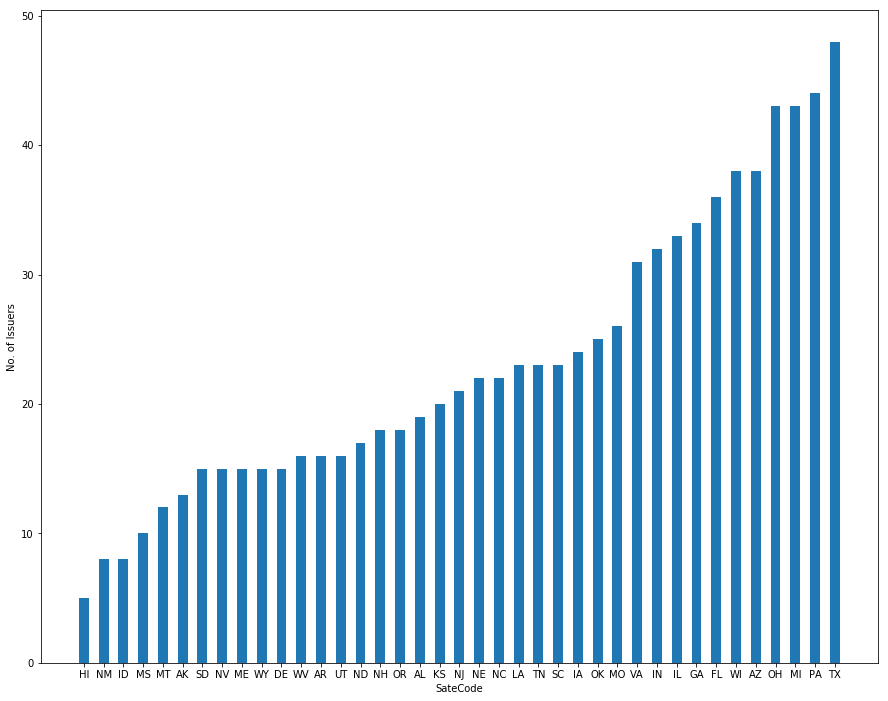

In [0]:
#create plot
fig18, ax = plt.subplots(1,1, figsize=(15,12))

#create index for bar charts
ind = np.arange(0,nbr_issuers.shape[0], 1)

#customise plot
ax.bar(ind, nbr_issuers['IssuerId'], 0.5)
ax.set_xticks(ind)
ax.set_xticklabels(nbr_issuers.StateCode)
ax.set_xlabel('SateCode')
ax.set_ylabel('No. of Issuers')

plt.show()

In [0]:
print(nbr_issuers.mean(), 'mean', '\n\n')
print(nbr_issuers.max(), 'max', '\n\n')
print(nbr_issuers.min(), 'min', '\n\n')

IssuerId    23.076923
dtype: float64 mean 


StateCode    WY
IssuerId     48
dtype: object max 


StateCode    AK
IssuerId      5
dtype: object min 




The number of issuers between states varies alots, with the average number of issuers being 24 (rounded up as count cant be in decimals) and ranging between 5 and 48.

##### b. Which states have the lowest and highest number of insurance issuers respectively?

AK has the lowest number of issuers which is 5, while WY has the higher number of issuers at 48.

#### 3. Could competition explain the difference in insurance premiums across states?

##### a. Use a scatterplot to plot the number of insurance issuers against the median insurance cost for each state.

In [0]:
#create new dataframe for medians of each state.
med_insr = ins_rates.groupby('StateCode')['IndividualRate'].median()
med_insr = med_insr.reset_index()

In [0]:
#check heads to view data for merge and use it to tally merge 
display(med_insr.sort_values(by='StateCode').head(3))
display(nbr_issuers.sort_values(by='StateCode').head(3))

,StateCode,IndividualRate
0,AK,597.93
1,AL,229.05
2,AR,225.59


,StateCode,IssuerId
5,AK,13
17,AL,19
12,AR,16


In [0]:
#merge the data
scatter_data = pd.merge(med_insr, nbr_issuers, on=['StateCode'], how='outer')

In [0]:
#check if the data has been merged properly
scatter_data.head(3)

,StateCode,IndividualRate,IssuerId
0,AK,597.93,13
1,AL,229.05,19
2,AR,225.59,16


In [0]:
#check shape to use number of rows for cols in scatter
scatter_data.shape

(39, 3)

Iterate between multiple lists: https://stackoverflow.com/questions/1663807/how-to-iterate-through-two-lists-in-parallel

Giving color to scatter: https://matplotlib.org/devdocs/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

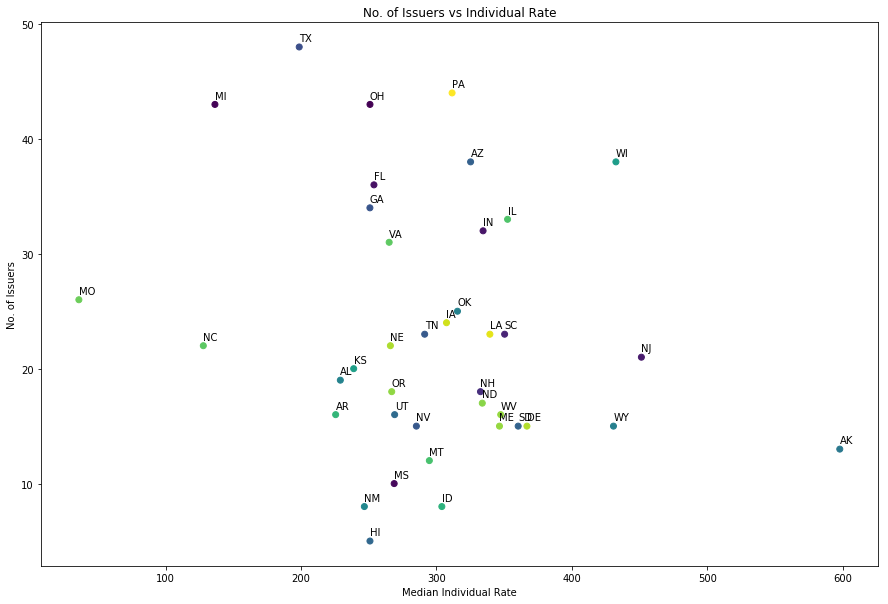

In [0]:
#create plot
fig19, ax = plt.subplots(1,1, figsize=(15,10))

#customise plot
ax.scatter(x=scatter_data.IndividualRate, y=scatter_data.IssuerId, c = np.random.rand(39))
ax.set_title('No. of Issuers vs Individual Rate')
ax.set_xlabel('Median Individual Rate')
ax.set_ylabel('No. of Issuers')

#label each scatter point
for x,y,z in zip(scatter_data.IndividualRate, scatter_data.IssuerId,scatter_data.StateCode):
    ax.text(x,y+.5,z)

##### b. Do you observe a relationship?

There seems to be a very slight trend that as insurance rates invcrease the number lf issuers decrease but the corelation is not that evident and hence is insufficient to say that the difference could be due to competition.

#### 4. Which state has the most expensive insurance issuer (in terms of median ‘IndividualRate’)?

In [0]:
#take out the median and max individual rate of each state grouped by year

fun = {'IndividualRate' : {'mediani' : 'median', 'Maxi' : 'max'}}
most_exp = ins_rates.groupby(['BusinessYear','StateCode'])['IndividualRate'].agg(fun)
most_exp.head()

C:\Users\rizvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\rizvi\Anaconda3\lib\site-packages\pandas\core\groupby.py:2946: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


IndividualRate         
                              mediani     Maxi
BusinessYear StateCode                        
2014         AK               610.810  1898.28
             AL               271.235  1574.19
             AR                36.400  1213.43
             AZ               310.260  1758.61
             DE               295.995  1140.18

In [0]:
#fix dataframe by reseting index, droping level in columns and renaming cols
most_exp.reset_index(inplace=True)
most_exp.columns = most_exp.columns.droplevel(0)
most_exp.columns = ['BusinessYear','StateCode', 'mediani', 'Maxi']
most_exp.head(1)

,BusinessYear,StateCode,mediani,Maxi
0,2014,AK,610.81,1898.28


In [0]:
#check dataframe
most_exp.head(5)

,BusinessYear,StateCode,mediani,Maxi
0,2014,AK,610.810,1898.28
1,2014,AL,271.235,1574.19
2,2014,AR,36.400,1213.43
3,2014,AZ,310.260,1758.61
4,2014,DE,295.995,1140.18


In [0]:
#add col to see difference between max and median of individual rate
most_exp['max-med'] = most_exp['Maxi'] - most_exp['mediani']

In [0]:
#check the state which has the highest difference of individual rate relative to median
most_exp[most_exp['max-med'] == most_exp['max-med'].max()]

,BusinessYear,StateCode,mediani,Maxi,max-med
45,2015,IN,33.87,1807.71,1773.84


In [0]:
#find the row to check the issuer id of that row by equating the statecode and max individual rate
ins_rates[(ins_rates['StateCode'] == 'IN') & (ins_rates['IndividualRate'] == 1807.71)]

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
4937486,2015,IN,91842,91842IN0190041,64,1807.71,2169.25
4937487,2015,IN,91842,91842IN0190041,65 and over,1807.71,2169.25


The state with statecode 'IN' has the issuer which has the highest individual rate relative to its states median; its issuer ID is 91842.